<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [27]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [28]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [29]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()
df_target_categorical

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [30]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda...... 
df_target_categorical['species'] = df_target.apply(lambda x: 'setosa' if x['species'] == 0 else ('versicolor' if x['species'] == 1 else 'virginica'), axis = 1)


In [31]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio

# imprimo 5 primeras filas y 5 últimas
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [32]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
especies = df_target_categorical.nunique()
print(f'la cantidad de especies de iris son {especies}')

la cantidad de especies de iris son species    3
dtype: int64


In [33]:
# Concatenar ambos dataset
df_target_concat = pd.concat ([df_data, df_target_categorical], axis=1)
df_target_concat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"
# df.loc['Nan'] = np.nan

# df_data.info()

des = df_data.describe()
des.loc['Nan'] = df_data.isna().sum()
des.loc['%Nan'] = (df_data.isna().mean())*100
des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [35]:
# Agregar el 0 en donde sea Nan
df_data.fillna(0, inplace=True)
# evaluar si queda algun Nan en el df_data
des = df_data.describe()
des.loc['Nan'] = df_data.isna().sum()
des.loc['%Nan'] = (df_data.isna().mean())*100
des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [36]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(...)
# se utiliza el 0 para tomar el elemento 0 de la lista [fila, columna]
print('la cantidad de filas y columnas para analizar son: ', df_data.shape[0])


la cantidad de filas y columnas para analizar son:  150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [37]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
# df_setosa = ...
# df_versicolor = ...
# df_verginica = ...

df_setosa = df_target_concat[df_target_concat['species'] == 'setosa']
df_versicolor = df_target_concat[df_target_concat['species'] == 'versicolor'] 
df_virginica = df_target_concat[df_target_concat['species'] == 'virginica']
# imprimir primeras filas de df_setosa
df_setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


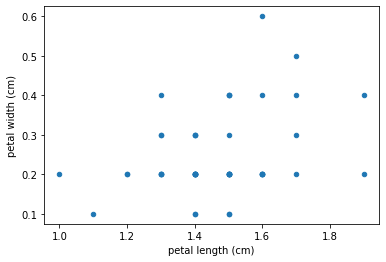

In [38]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length cm" (x) y "petal width cm" (y) de la especie setosa
df_setosa.plot.scatter('petal length (cm)', 'petal width (cm)')


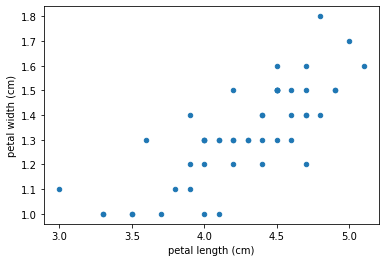

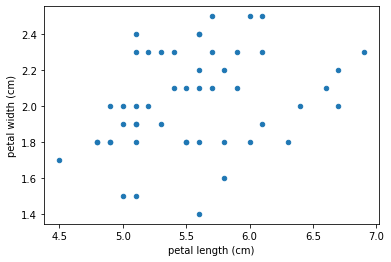

In [39]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie
df_versicolor.plot.scatter('petal length (cm)', 'petal width (cm)')
df_virginica.plot.scatter('petal length (cm)', 'petal width (cm)')

